In [1]:
import h5py
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import numpy as np
import cv2

sns.set_style('darkgrid')

In [30]:
def plot_chirps(chirps):
    times = [i for i in range(1024)]

    plt.figure(figsize=(15, 10))

    for channel in range(16):
        plt.plot(times, chirps[channel])

    plt.rcParams['font.size'] = '18'
    plt.xlabel('Time (ms)')
    plt.ylabel('Intensity (dB)')
    plt.savefig('./chirp.svg')

In [3]:
FILE_NAME = 'EXP_17_M'

In [4]:
file = h5py.File(f'../../data/real/{FILE_NAME}.h5', 'r')

In [5]:
def cam_Image(data, frame):
    dbkeys = list(data.keys())

    if dbkeys[0][2] == 'm':
        height = int(data[dbkeys[0]].shape[1])
        width  = int(data[dbkeys[0]].shape[0]/(len(list(data[dbkeys[1]])) * 3))
        im = np.array(data[dbkeys[0]][width*3*frame: width*3*frame +  width*3])
        im = im.flatten()
        _imageFrame = np.array(np.reshape(im, (height, width,3)))
        return _imageFrame
    else:
        print('Cam image not found!')

plt.figure(figsize=(30, 15))
plt.imshow(cv2.cvtColor(cam_Image(file, 180), cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.grid(False)
plt.savefig('Experimento com moto.png')

ValueError: cannot reshape array of size 0 into shape (376,1344,3)

<Figure size 2160x1080 with 0 Axes>

In [6]:
len(file['Chn1'])

14464

In [7]:
raw_data = []

for time in range(len(file['Chn1'])):
    frame = []
    
    for channel in range(1, 17):
        channel_values = file['Chn' + str(channel)][time]
        #channel_values[:50] = 0
        frame.append(channel_values)
        
    raw_data.append(frame)

raw_data = np.array(raw_data).astype(np.float32)

In [8]:
raw_data = raw_data[7_296:9_856]

In [9]:
np.save(f'../../data/preprocessed/{FILE_NAME}_more15m.npy', raw_data)
raw_data.shape

(2560, 16, 1024)

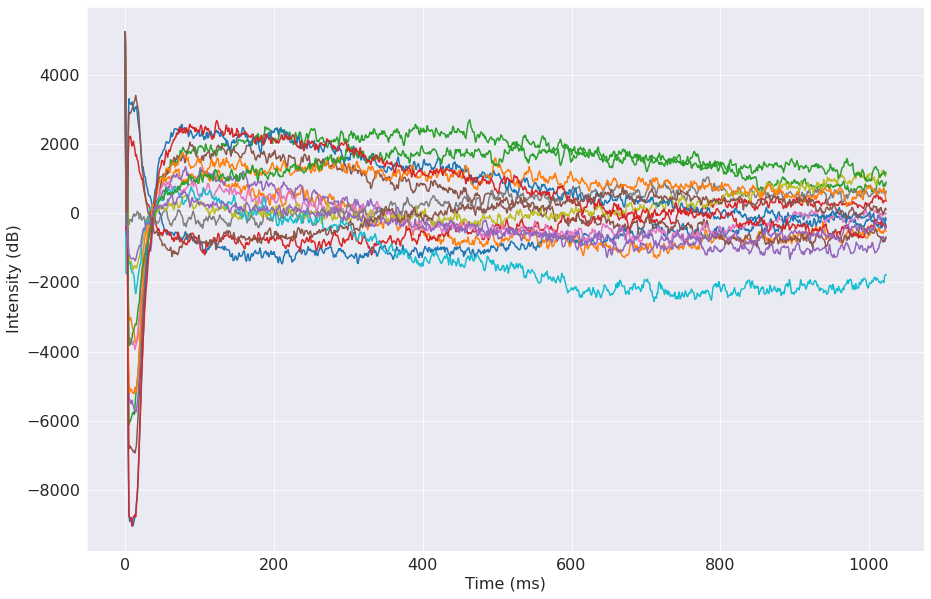

In [31]:
plot_chirps(raw_data[5000])

In [83]:
raw_data = raw_data.swapaxes(1, 2)

In [84]:
raw_data.shape

(2560, 1024, 16)

In [85]:
data_min = raw_data.min()
data_max = raw_data.max()

In [86]:
a, b = -1, 1

In [87]:
np.subtract(raw_data, data_min, out=raw_data)
np.multiply(raw_data, (b - a), out=raw_data)
np.divide(raw_data, (data_max - data_min), out=raw_data)
np.add(raw_data, a, out=raw_data)
raw_data

array([[[-0.03118199, -0.03118199, -0.03118199, ..., -0.03118199,
         -0.03118199, -0.03118199],
        [-0.03118199, -0.03118199, -0.03118199, ..., -0.03118199,
         -0.03118199, -0.03118199],
        [-0.03118199, -0.03118199, -0.03118199, ..., -0.03118199,
         -0.03118199, -0.03118199],
        ...,
        [-0.11965191, -0.18636692,  0.2762872 , ..., -0.17186368,
         -0.18636692, -0.01812905],
        [-0.07324147, -0.18926758,  0.26613486, ..., -0.17331398,
         -0.18781728, -0.01232779],
        [-0.10079765, -0.19071794,  0.26613486, ..., -0.20087022,
         -0.1791153 ,  0.01812911]],

       [[-0.03118199, -0.03118199, -0.03118199, ..., -0.03118199,
         -0.03118199, -0.03118199],
        [-0.03118199, -0.03118199, -0.03118199, ..., -0.03118199,
         -0.03118199, -0.03118199],
        [-0.03118199, -0.03118199, -0.03118199, ..., -0.03118199,
         -0.03118199, -0.03118199],
        ...,
        [-0.08629441, -0.25018132,  0.26468456, ..., -

In [88]:
raw_data[10, 0, :]

array([-0.03118199, -0.03118199, -0.03118199, -0.03118199, -0.03118199,
       -0.03118199, -0.03118199, -0.03118199, -0.03118199, -0.03118199,
       -0.03118199, -0.03118199, -0.03118199, -0.03118199, -0.03118199,
       -0.03118199], dtype=float32)

In [89]:
raw_data[0][0]

array([-0.03118199, -0.03118199, -0.03118199, -0.03118199, -0.03118199,
       -0.03118199, -0.03118199, -0.03118199, -0.03118199, -0.03118199,
       -0.03118199, -0.03118199, -0.03118199, -0.03118199, -0.03118199,
       -0.03118199], dtype=float32)

In [90]:
print(data_min, data_max)

-2672.0 2844.0


In [92]:
np.save(f'../../data/preprocessed/{FILE_NAME}_more15m_scaled.npy', raw_data)